# Print poison setup

In [33]:
exp = 'imagenette/exp01'
check_paths = {}

In [34]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:32'

In [35]:
import pickle

poison_info_path = f'/xxx/open_source/wichesbrew/{exp}/poisons/poison_info.pkl'
check_paths['poison_info_path'] = poison_info_path

with open(poison_info_path, 'rb') as file:
    poison_info = pickle.load(file)

if isinstance(poison_info, dict):
    for key in poison_info.keys():
        print(f'Key: {key}')
else:
    print('The loaded data is not a dictionary.')
print(check_paths)

In [36]:
"""
n01440764='tench',
n02102040='English springer',
n02979186='cassette player',
n03000684='chain saw',
n03028079='church',
n03394916='French horn',
n03417042='garbage truck',
n03425413='gas pump',
n03445777='golf ball',
n03888257='parachute'
"""
imagenette_labels = {
    0: "tench",
    1: "English springer",
    2: "cassette player",
    3: "chain saw'",
    4: "church",
    5: "French horn",
    6: "garbage truck",
    7: "gas pump",
    8: "golf ball",
    9: "parachute"
}

In [37]:
poison_info['poison_setup'] # airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck
# target class: the original true class
# poison class: the modified one
# in this case, the airplane (0) image is poisoned to be as class horse (7)

{'poison_budget': 0.1,
 'target_num': 1,
 'poison_class': 1,
 'target_class': 5,
 'intended_class': [1]}

In [38]:
print(f"the affected test image is from class {imagenette_labels[poison_info['poison_setup']['target_class']]} ({poison_info['poison_setup']['target_class']})")
print(f"with witchesbrew, the victim model wrongly predict it as class {imagenette_labels[poison_info['poison_setup']['poison_class']]} ({poison_info['poison_setup']['poison_class']})\n")
print(f"such attack is made by adding adv patterns on selected images from class {imagenette_labels[poison_info['poison_setup']['intended_class'][0]]} ({poison_info['poison_setup']['intended_class'][0]})")

the affected test image is from class French horn (5)
with witchesbrew, the victim model wrongly predict it as class English springer (1)

such attack is made by adding adv patterns on selected images from class English springer (1)


In [66]:
if isinstance(eval_train_set.targets, list):
    targets = np.array(eval_train_set.targets)
else:
    targets = eval_train_set.targets  # If it's already a tensor or array

count_label_vc = (targets == 1).sum()
print(f"Number of examples with label 5: {count_label_vc}")

Number of examples with label 5: 955


In [39]:
poison_info['poison_delta'].shape

torch.Size([947, 3, 160, 160])

In [40]:
manip_idx = poison_info['poison_ids']
manip_idx.shape

torch.Size([947])

# Load Pretrained Model (Victim)

In [41]:
import sys
import torch
import torchvision
from torchvision.models.resnet import BasicBlock, Bottleneck

pgm_dir = "/data/xxx/github/poisoning-gradient-matching"
sys.path.append(pgm_dir)
import forest

In [42]:
net = ['ResNet18']
dataset = 'Imagenette'
recipe = 'gradient-matching'
threatmodel = 'single-class'
poisonkey = None
modelkey = None
eps = 16
budget = 0.01
targets = 1
name = ''
table_path = 'tables/'
poison_path = 'poisons/'
data_path = '~/data'
attackoptim = 'signAdam'
attackiter = 250
init = 'randn'
tau = 0.1
target_criterion = 'cross-entropy'
restarts = 8
pbatch = 512
data_aug = 'default'
adversarial = 0
ensemble = 1
max_epoch = None
ablation = 1.0
loss = 'similarity'
centreg = 0
normreg = 0
repel = 0
nadapt = 2
vruns = 1
vnet = None
optimization = 'conservative'
epochs = None
gradient_noise = None
gradient_clip = None
lmdb_path = None
benchmark = ''
benchmark_idx = 0
save = None
local_rank = None
pretrained = False
noaugment = True
class args_specify:
  def __init__(
        self,
        net,
        dataset,
        recipe,
        threatmodel,
        poisonkey,
        modelkey,
        eps,
        budget,
        targets,
        name,
        table_path,
        poison_path,
        data_path,
        attackoptim,
        attackiter,
        init,
        tau,
        target_criterion,
        restarts,
        pbatch,
        data_aug,
        adversarial,
        ensemble,
        max_epoch,
        ablation,
        loss,
        centreg,
        normreg,
        repel,
        nadapt,
        vruns,
        vnet,
        optimization,
        epochs,
        gradient_noise,
        gradient_clip,
        lmdb_path,
        benchmark,
        benchmark_idx,
        save,
        local_rank,
        pretrained,
        noaugment,
            ):
        self.net = net
        self.dataset = dataset
        self.recipe = recipe
        self.threatmodel = threatmodel
        self.poisonkey = poisonkey
        self.modelkey = modelkey
        self.eps = eps
        self.budget = budget
        self.targets = targets
        self.name = name
        self.table_path = table_path
        self.poison_path = poison_path
        self.data_path =data_path
        self.attackoptim = attackoptim
        self.attackiter = attackiter
        self.init = init
        self.tau = tau
        self.target_criterion = target_criterion
        self.restarts = restarts
        self.pbatch = pbatch
        self.data_aug = data_aug
        self.adversarial = adversarial
        self.ensemble = ensemble
        self.max_epoch = max_epoch
        self.ablation = ablation
        self.loss = loss
        self.centreg = centreg
        self.normreg = normreg
        self.repel = repel
        self.nadapt = nadapt
        self.vruns = vruns
        self.vnet = vnet
        self.optimization = optimization
        self.epochs = epochs
        self.gradient_noise = gradient_noise
        self.gradient_clip = gradient_clip
        self.lmdb_path = lmdb_path
        self.benchmark = benchmark
        self.benchmark_idx = benchmark_idx
        self.save = save
        self.local_rank = local_rank
        self.pretrained = pretrained
        self.noaugment = noaugment

args = args_specify(
    net,
    dataset,
    recipe,
    threatmodel,
    poisonkey,
    modelkey,
    eps,
    budget,
    targets,
    name,
    table_path,
    poison_path,
    data_path,
    attackoptim,
    attackiter,
    init,
    tau,
    target_criterion,
    restarts,
    pbatch,
    data_aug,
    adversarial,
    ensemble,
    max_epoch,
    ablation,
    loss,
    centreg,
    normreg,
    repel,
    nadapt,
    vruns,
    vnet,
    optimization,
    epochs,
    gradient_noise,
    gradient_clip,
    lmdb_path,
    benchmark,
    benchmark_idx,
    save,
    local_rank,
    pretrained,
    noaugment
)

In [43]:
setup = forest.utils.system_startup(args)
model_wrapped = forest.Victim(args, setup=setup)
victim_model_path = f'/xxx/open_source/wichesbrew/{exp}/models/victim.pth'
victim_model = model_wrapped.load_model(victim_model_path) # saved in brew_poison
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
victim_model = victim_model.to(device)  

check_paths['victim_model_path'] = victim_model_path
for key, value in check_paths.items():
    print(f"{key}: {value}")

# Evaluate ACC

In [44]:
batch_size = args.pbatch
batch_size

512

In [45]:
# prepare data
test_augment = []
mean, std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
test_transforms = torchvision.transforms.Compose(test_augment + [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize(mean, std)])

root_dir = f'/xxx/open_source/wichesbrew/{exp}/poisons' 
# train_set = torchvision.datasets.ImageFolder(root=root_dir +'/train', transform=train_nonomalize_transforms)
test_set = torchvision.datasets.ImageFolder(root=root_dir + '/test', transform=test_transforms)
eval_train_set = torchvision.datasets.ImageFolder(root=root_dir + '/train', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=False)

check_paths['root_dir'] = root_dir
for key, value in check_paths.items():
    print(f"{key}: {value}")

In [46]:
def calculate_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

accuracy = calculate_accuracy(victim_model, test_loader)
accuracy # accross 9999 clean test examples

76.0

## For the attacked test exmaple

In [47]:
print(poison_info['poison_setup'])
GT = poison_info['poison_setup']['target_class']
print(f"test image's gt: {GT}")

{'poison_budget': 0.1, 'target_num': 1, 'poison_class': 1, 'target_class': 5, 'intended_class': [1]}
test image's gt: 5


In [48]:
from PIL import Image
from torch.utils.data import Dataset
import torch

# Safe image loader
def safe_load_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Check if the image is valid
        img = Image.open(image_path)  # Reload the image for processing
        return img
    except (IOError, SyntaxError) as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# the modified label for the poisoned test example
target = torch.tensor([poison_info['poison_setup']['poison_class']])  # horse

class SingleImageDataset(Dataset):
    def __init__(self, image_path, transform=None):
        self.image_path = image_path
        self.transform = transform
        self.image = safe_load_image(image_path)  # Using safe_load_image

    def __len__(self):
        return 1  # Since we have only one image

    def __getitem__(self, idx):
        if self.image is None:
            raise ValueError(f"Image at {self.image_path} could not be loaded.")
        
        if self.transform:
            return self.transform(self.image), target
        return self.image, target

#################################################################################################################################
affected_test_path = '/xxx/open_source/wichesbrew/imagenette/exp01/poisons/targets/n02102040/2188.png' # 'poison_class'
#################################################################################################################################
victim_dataset = SingleImageDataset(affected_test_path, transform=test_transforms)
victim_loader = torch.utils.data.DataLoader(victim_dataset, batch_size=1, shuffle=False, num_workers=1, pin_memory=False)
victim_dataset[0]

(tensor([[[ 0.6734,  0.2967,  0.4508,  ...,  0.2967,  0.2282, -0.0287],
          [ 0.8104,  0.5536,  0.6563,  ...,  0.0227, -0.1314, -0.4054],
          [ 0.9988,  0.8789,  0.9303,  ..., -0.1143, -0.2856, -0.5424],
          ...,
          [-1.0904, -1.2103, -1.2617,  ..., -0.7308, -0.6794, -0.8164],
          [-1.0390, -1.1932, -1.2617,  ..., -0.9705, -1.1075, -1.0219],
          [-0.9192, -1.1247, -1.2274,  ..., -0.8335, -0.9534, -0.8678]],
 
         [[ 0.3803,  0.0126,  0.1352,  ...,  0.1001,  0.0301, -0.2325],
          [ 0.5203,  0.2752,  0.3452,  ..., -0.1800, -0.3375, -0.6176],
          [ 0.7129,  0.6078,  0.6254,  ..., -0.3200, -0.4951, -0.7577],
          ...,
          [-1.3004, -1.4405, -1.4755,  ..., -1.2479, -1.1604, -1.2479],
          [-1.2479, -1.4055, -1.4755,  ..., -1.5280, -1.7206, -1.6331],
          [-1.1429, -1.3354, -1.4405,  ..., -1.4055, -1.6155, -1.5805]],
 
         [[ 0.2173, -0.1835, -0.0441,  ...,  0.0256, -0.0441, -0.3055],
          [ 0.3568,  0.0779,

In [49]:
check_paths['affected_test_path'] = affected_test_path
for key, value in check_paths.items():
    print(f"{key}: {value}")

In [50]:
from torch.cuda.amp import autocast

correct = 0
total = 0
criterion = torch.nn.CrossEntropyLoss() 

with torch.no_grad():
    for image, label in victim_loader:
        with autocast():  # Use the correct autocast function
            image = image.cuda()
            label = label.squeeze(1).cuda()
            output = victim_model(image)
            pred = torch.argmax(output, dim=1)  # Specify the dimension for argmax
            print(f"(target) label: {label.item()}")
            print(f"pred: {pred}")
            print(f"gt: {GT}")
            print(f"output: {output}")
            loss = criterion(output, label)  
            print("adv loss:", loss.item())
        correct += (pred == label).sum().item()  # Count correct predictions
        total += label.shape[0]  # Count total samples

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}% (among all {total} test examples)')

(target) label: 1
pred: tensor([1], device='cuda:0')
gt: 5
output: tensor([[-0.5684,  4.4023,  1.8545,  0.4585, -2.3730,  3.7441, -2.2051, -3.0625,
          0.8613, -3.3301]], device='cuda:0', dtype=torch.float16)
adv loss: 0.50390625
Accuracy: 100.00% (among all 1 test examples)


Calculated influence

In [52]:
# !pip install kronfluence
from kronfluence.analyzer import Analyzer, prepare_model
from kronfluence.arguments import FactorArguments
from kronfluence.task import Task
from typing import Tuple

In [53]:
BATCH_TYPE = Tuple[torch.Tensor, torch.Tensor]

class ClassificationTask(Task):
    def compute_train_loss(
        self,
        batch: BATCH_TYPE,
        model: torch.nn.Module,
        sample: bool = False,
    ) -> torch.Tensor:
        inputs, labels = batch
        logits = model(inputs)
        if not sample:
            return torch.nn.functional.cross_entropy(logits, labels, reduction="sum")
        with torch.no_grad():
            probs = torch.nn.functional.softmax(logits, dim=-1)
            sampled_labels = torch.multinomial(
                probs,
                num_samples=1,
            ).flatten()
        return torch.nn.functional.cross_entropy(logits, sampled_labels.detach(), reduction="sum")

    def compute_measurement(
        self,
        batch: BATCH_TYPE,
        model: torch.nn.Module,
    ) -> torch.Tensor:
        inputs, labels = batch
        logits = model(inputs)

        bindex = torch.arange(logits.shape[0]).to(device=logits.device, non_blocking=False)
        logits_correct = logits[bindex, labels]

        cloned_logits = logits.clone()
        cloned_logits[bindex, labels] = torch.tensor(-torch.inf, device=logits.device, dtype=logits.dtype)

        margins = logits_correct - cloned_logits.logsumexp(dim=-1)
        return -margins.sum()

In [54]:
print(exp)

imagenette/exp01


In [55]:
# Kronfluence setup
task = ClassificationTask()
##########################################################################################
model = prepare_model(model=victim_model, task=task) # wrap the model 
##########################################################################################
analyzer = Analyzer(analysis_name=f'detect_wb_analysis_{exp}', model=model, task=task)

def fit_influence_factors(train_loader):
    # Fit all EKFAC factors for the given model
    collected_train_data = CollectedDataset(train_loader)
    wrapped_train_dataset = DataSetWrapper(collected_train_data)
    analyzer.fit_all_factors(
        factors_name="ekfac",
        dataset=wrapped_train_dataset,
        per_device_batch_size=25,
        factor_args=FactorArguments(strategy='ekfac'),
        overwrite_output_dir=True,
    )

def compute_influences(train_loader, deletion_loader, score_name):
    analyzer.compute_pairwise_scores(
        scores_name=score_name, 
        factors_name="ekfac",
        train_dataset=train_loader,
        query_dataset=deletion_loader,
        per_device_query_batch_size=1, # set to 1 here, otherwise we have indexoutofbound error (not sure)
        overwrite_output_dir=True
    )
    return analyzer.load_pairwise_scores(score_name)

class DataSetWrapper(Dataset):
    """ Wrap the dataset to return only images and targets, as expected by ptif """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        data = self.dataset[idx]
        return data[0], data[1]  
    
class CollectedDataset(Dataset):
    """Aggregates all data into a single dataset from a DataLoader."""
    def __init__(self, loader):
        self.data = []
        self.targets = []
        self.additional_info = []

        first_batch = next(iter(loader))
        has_additional_info = len(first_batch) == 3

        for batch in loader:
            self.data.append(batch[0])
            batch_targets = batch[1]
            if batch_targets.ndim == 0:
                batch_targets = batch_targets.unsqueeze(0) 
            self.targets.append(batch_targets)
            if has_additional_info:
                self.additional_info.append(batch[2])
        
        # Concatenate lists into tensors
        self.data = torch.cat(self.data, dim=0)
        self.targets = torch.cat(self.targets, dim=0)
        if has_additional_info:
            self.additional_info = torch.cat(self.additional_info, dim=0)
        else:
            self.additional_info = None  # Handle cases without additional info

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if self.additional_info is not None:
            return self.data[index], self.targets[index], self.additional_info[index]
        else:
            return self.data[index], self.targets[index]

In [56]:
# train_augment = [torchvision.transforms.RandomCrop(32, padding=4), torchvision.transforms.RandomHorizontalFlip()]
# train_nonomalize_transforms =  torchvision.transforms.Compose(train_augment + [torchvision.transforms.ToTensor()]) # try this first
# train_transforms = torchvision.transforms.Compose(train_nonomalize_transforms + [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize(mean, std)])
ooo_train_set = torchvision.datasets.ImageFolder(root=root_dir +'/train', transform = test_transforms) # out of order
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=False)
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=False)

In [57]:
import torchvision.datasets as datasets

# Extract file paths and their corresponding labels 
file_paths = [s[0] for s in ooo_train_set.samples]          # <-- Let's recover order
labels = [s[1] for s in ooo_train_set.samples]

# Sort file paths based on their filenames (numerical order)
sorted_samples = sorted(zip(file_paths, labels), key=lambda x: int(os.path.splitext(os.path.basename(x[0]))[0]))

# Create a new dataset from the sorted samples
class SortedImageFolder(datasets.ImageFolder):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform
        self.loader = datasets.folder.default_loader
        self.targets = [s[1] for s in samples]
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target
    
    def __len__(self):
        return len(self.samples)

# Create the new sorted dataset
sorted_train_set = SortedImageFolder(sorted_samples, transform=test_transforms)

# Verify that the dataset is sorted correctly
for i in range(10):
    img, label = sorted_train_set[i]
    print(f"Index {i}: Filename: {sorted_samples[i][0]}, Label: {label}")
print('...')

In [58]:
train_set = sorted_train_set
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=False)

In [59]:
manip_idx[:10]

tensor([1799, 1077, 1754, 1742, 1329, 1141, 1694, 1255, 1765, 1484])

In [60]:
poison_class = poison_info['poison_setup']['poison_class']
poison_class

1

In [61]:
import numpy as np
# sanity check
# all manip examples should come from the same class
for i, idx in enumerate(manip_idx):
    # print(train_set[idx][1])
    if train_set[idx][1] != poison_class:
        print("sanity check faield, check dataloader...")
        break
    if i == len(manip_idx)-1:
        print("sanity check passed, go ahead!")

sanity check passed, go ahead!


In [62]:
wrapped_train_dataset = DataSetWrapper(CollectedDataset(train_loader))
# wrapped_test_dataset = DataSetWrapper(CollectedDataset(test_loader))
wrapped_victim_dataset = DataSetWrapper(CollectedDataset(victim_loader))

In [67]:
########################################################################################################################
# Step 0: Fitting all factors
fit_influence_factors(train_loader)

Fitting covariance matrices [379/379] 100%|██████████ [time left: 00:00, time spent: 00:45]
Performing Eigendecomposition [21/21] 100%|██████████ [time left: 00:00, time spent: 00:01]
Fitting Lambda matrices [379/379] 100%|██████████ [time left: 00:00, time spent: 01:06]


In [70]:
# Step 1: Calculate influence scores
old_scores_name = "old_scores"
old_scores = compute_influences(wrapped_train_dataset, wrapped_victim_dataset, old_scores_name)

Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:03]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:04]
Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:03]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:03]
Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:10]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:11]
Computing pairwise scores (training gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:05]
Computing pairwise scores (query gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:06]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:41]
Computing pairwise scores (query gradient) [1/1] 100%|██████████ [time left: 00:

In [73]:
old_scores_save_dir = f'/xxx/open_source/wichesbrew/{exp}/scores/old_scores.npy'
old_scores_ts = old_scores['all_modules']
np.save(old_scores_save_dir, old_scores_ts)

In [74]:
# load calculated scores
old_scores = np.load(old_scores_save_dir)
old_scores_ts = torch.tensor(old_scores)
old_scores_ts.shape

torch.Size([1, 9469])

In [77]:
imagenette_labels_coded = {
0: 'n01440764',
1: 'n02102040',
2: 'n02979186',
3: 'n03000684',
4: 'n03028079',
5: 'n03394916',
6: 'n03417042',
7: 'n03425413',
8: 'n03445777',
9: 'n03888257'
}
"""
imagenette_labels = {
    0: "tench",
    1: "English springer",
    2: "cassette player",
    3: "chain saw'",
    4: "church",
    5: "French horn",
    6: "garbage truck",
    7: "gas pump",
    8: "golf ball",
    9: "parachute"
}
"""

'\nimagenette_labels = {\n    0: "tench",\n    1: "English springer",\n    2: "cassette player",\n    3: "chain saw\'",\n    4: "church",\n    5: "French horn",\n    6: "garbage truck",\n    7: "gas pump",\n    8: "golf ball",\n    9: "parachute"\n}\n'

In [78]:
poison_class_directory = f'/xxx/open_source/wichesbrew/{exp}/poisons/train/{imagenette_labels_coded[poison_info['poison_setup']['poison_class']]}' # poison_class

check_paths['poison_class_directory'] = poison_class_directory
check_paths['old_scores_save_dir'] = old_scores_save_dir
for key, value in check_paths.items():
    print(f"{key}: {value}")

In [79]:
poison_class_directory

In [80]:
# if all x->7 have high influence on this test point [0->7]?
# get all class_[poison_class] examples' indices
import re

# List to store the numbers
numbers = []

# Regular expression to match the pattern 'xxx.png' where xxx is a number
pattern = re.compile(r'^(\d+)\.png$')

# Loop through the files in the directory
for filename in os.listdir(poison_class_directory):
    match = pattern.match(filename)
    if match:
        # Extract the number and convert it to an integer
        number = int(match.group(1))
        # Add the number to the list
        numbers.append(number)

numbers.sort()
print(numbers)

[963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135

In [81]:
class_poison_class_idx = numbers
len(class_poison_class_idx)

955

In [82]:
count = 0
for i, idx in enumerate(numbers):
    if train_set[idx][1] == poison_class:
        count += 1
print(count)

955


In [84]:
# among the 955, 947 are poisons (for imagenette, we have to use this large budge to successfully inject the poison)
len(manip_idx)

947

In [85]:
manip_idx_arr = manip_idx.numpy()
len(class_poison_class_idx), len(manip_idx_arr)

(955, 947)

In [86]:
class_pc_clean_idx = np.setdiff1d(class_poison_class_idx, manip_idx_arr)
class_pc_clean_idx.shape

(8,)

In [87]:
class_pc_clean_idx

array([ 984, 1125, 1415, 1444, 1568, 1753, 1856, 1864])

Use some [poison_class]->[poison_class] as new test points

In [88]:
# get full_test_loader (1000 clean exmaples)
poison_info['poison_setup']

{'poison_budget': 0.1,
 'target_num': 1,
 'poison_class': 1,
 'target_class': 5,
 'intended_class': [1]}

In [48]:
# draw all clean images of 7->7
# make sure the victim can correctly predict the new test point (here we use 7->7)
# intended_target = torch.tensor([poison_class]) # horse
# intended_target

tensor([68])

In [89]:
# Load the dataset
testset_path = f'/xxx/open_source/wichesbrew/{exp}/poisons/test'
full_test_dataset = datasets.ImageFolder(root=testset_path, transform=test_transforms)

check_paths['testset_path'] = testset_path
for key, value in check_paths.items():
    print(f"{key}: {value}")

# boosting one test point with random_transformations + random targets

In [90]:
old_scores_matrix = old_scores_ts.numpy()
old_scores_matrix.shape

(1, 9469)

In [91]:
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, images, targets):
        self.images = images
        self.targets = targets

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.targets[idx]

In [92]:
def color_switch(img):
    permuted_img = img.clone()  # Clone the image to avoid modifying the original
    permuted_img[0], permuted_img[1] = img[1], img[0]  # Swap red and green channels
    return permuted_img

In [93]:
from PIL import Image
import random
random.seed(3047)
n_boosting = 50
num_classes = 10
attack_target = poison_info['poison_setup']['poison_class']
attack_target

1

In [96]:
def randomize_targets(n_boosting, attack_target):
  """
  Generates a list of n random numbers from 0 to 9, excluding the attack_target.
  """

  random_numbers = []
  while len(random_numbers) < n_boosting:
    num = random.randint(0, num_classes-1)
    if num != attack_target:
      random_numbers.append(num)
  return random_numbers

In [97]:
def random_transform_images(loader):
    transformed_images = []
    randomized_targets = []
    transforms_applied = []
 
    randomized_targets = randomize_targets(n_boosting, attack_target)
    print(f"randomized_targets: {randomized_targets}")

    for img, target in loader: # only one victim image here
        # Define your transformations
        flip = transforms.functional.hflip
        color_jitter = transforms.ColorJitter(
            brightness=(0.9, 1.1),  # Brightness change from 80% to 120%
            contrast=(0.9, 1.1),    # Contrast change from 80% to 120%
            saturation=(0.6, 1.4),  # Saturation change from 80% to 120%
            hue=(-0.1, 0.1)         # Hue change from -10% to 10%
        )
        # random_affine = transforms.RandomAffine(degrees=45, translate=(0.1, 0.3), scale=(1, 2), shear=30)
        random_affine = transforms.RandomAffine(degrees=(-180, 180), scale=(1, 2), shear=10)
        elastic = transforms.ElasticTransform(alpha=150.0)
        # gray = transforms.Grayscale()
        blurrer = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(8., 10.))
        inverter = transforms.RandomInvert(p=1.0)
        transformations = ['flip', 'color_jitter', 'random_affine', 'elastic', 'blurrer', 'inverter', 'color_switch']

        img = img.squeeze() # the batch_size has to be one
        """
        if isinstance(img, torch.Tensor):
            # (C, H, W) format, convert it to a PIL image
            img = transforms.ToPILImage()(img)
        """
        # Randomly choose one transformation one time
        for i in range(n_boosting): # synthesize 20 old-new pairs
            selected_transform = random.choice(transformations)
            transforms_applied.append(selected_transform)

            if selected_transform == 'flip':
                transformed_img = flip(img)
            elif selected_transform == 'color_jitter':
                transformed_img = color_jitter(img)
            elif selected_transform == 'random_affine':
                transformed_img = random_affine(img)
            elif selected_transform == 'elastic':
                transformed_img = elastic(img)
            elif selected_transform == 'blurrer':
                # g_img = gray(img)
                # g_img = g_img.repeat(3, 1, 1)  # keep the shape = [3, 32, 32]
                transformed_img = blurrer(img)
            elif selected_transform == 'inverter':
                transformed_img = inverter(img)
            elif selected_transform == 'color_switch':
                transformed_img = color_switch(img)
            else:
                raise("Unknown Transformation")
            
            # transformed_img = transforms.ToTensor()(transformed_img)
            # print(f"transformed_img: {transformed_img.shape}")
            transformed_images.append(transformed_img)

    transformed_dataset = CustomDataset(transformed_images, randomized_targets)  
    return torch.utils.data.DataLoader(transformed_dataset, batch_size=1, shuffle=False) , transforms_applied, transformed_images, randomized_targets

In [98]:
mm_loader, mm_transforms, mm_dataset, mm_targets = random_transform_images(victim_loader)

randomized_targets: [5, 9, 6, 4, 9, 8, 9, 9, 3, 4, 3, 7, 5, 0, 9, 9, 8, 6, 7, 3, 6, 4, 6, 7, 0, 2, 3, 5, 3, 7, 4, 4, 0, 9, 7, 9, 8, 0, 6, 0, 4, 0, 0, 8, 9, 9, 6, 5, 7, 7]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


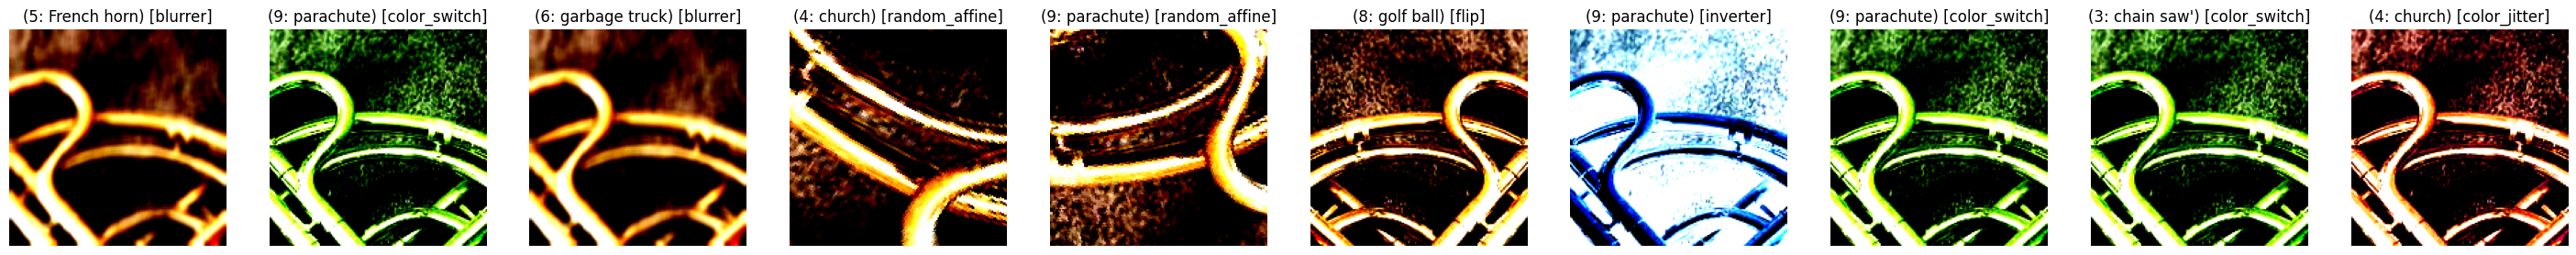

In [103]:
import matplotlib.pyplot as plt
def mm_show_images_from_dataloader(dataloader, num_images=10): 
    plt.figure(figsize=(36, 12))
    iterator = iter(dataloader)
    for i in range(num_images):  
        image, label = next(iterator) 
        # Convert from tensor to numpy array and transpose to HWC format
        img = image.squeeze()
        img = img.permute(1, 2, 0).numpy()
        # print(f"img: {img}")
        # Plot the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels for clarity
        plt.title(f"({mm_targets[i]}: {imagenette_labels[mm_targets[i]]}) [{mm_transforms[i]}]")
    plt.show()
mm_show_images_from_dataloader(mm_loader, 10)

In [104]:
# calculate influences on the boosted loader
wrapped_mm_aux_dataset = DataSetWrapper(CollectedDataset(mm_loader))

# Update the flipped_scores_name and flipped_score_save_dir dynamically
aux_mm_scores_name = "aux_mm_scores"
aux_mm_scores = compute_influences(wrapped_train_dataset, wrapped_mm_aux_dataset, aux_mm_scores_name)

aux_mm_scores_save_dir = f'/xxx/open_source/wichesbrew/{exp}/scores/MM_aux_{n_boosting}_scores.npy'

# Save the scores
aux_mm_scores_ts = aux_mm_scores['all_modules']
np.save(aux_mm_scores_save_dir, aux_mm_scores_ts)

Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:01]
Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:01]
Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:04]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:05]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]

Computing pairwise scores (training gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:01]
Computing pairwise scores (query gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:02]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:40]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:40]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:40]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:40]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:40]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:41]
Computing pairwise scores (training gradient) [19/19] 100%|██████████ [time left: 00:00, time spent: 00:40]
Computing pairwise scores (training

In [105]:
aux_mm_scores_save_dir = f'/xxx/open_source/wichesbrew/{exp}/scores/MM_aux_{n_boosting}_scores.npy'
# Load the saved scores (optional if you need to use them later in the loop)
boosted_aux_mm_scores_ts = np.load(aux_mm_scores_save_dir)
# Process the scores if necessary
boosted_aux_mm_scores_matrix = boosted_aux_mm_scores_ts.squeeze()

boosted_aux_mm_scores_matrix.shape

(50, 9469)

fix the setting, using n_boosting = 50

In [118]:
######################## 
th = 0               # <--- remember to use the same hparams for MM, ML & MI (Ablations)
n_tolerate = 1 # 1
########################
# Step 1: Concatenate the matrices into a single matrix
boosted_change_scores_matrix = boosted_aux_mm_scores_matrix - old_scores_matrix
all_indices = np.arange(0, boosted_change_scores_matrix.shape[1]).tolist()
boosted_change_scores_matrix.shape

(50, 9469)

In [119]:
# Step 2: Map the values into boolean (True if negative)
boolean_matrix = boosted_change_scores_matrix[:, all_indices] < th

# Step 3: Reduce the matrix into one row by summing all the rows (count of True values per column)
negative_counts_per_column = boolean_matrix.sum(axis=0)

# Optionally, print the result
print("Count of negative values in each column:", negative_counts_per_column)

detected = torch.tensor(negative_counts_per_column >= (boosted_change_scores_matrix.shape[0]-n_tolerate))

temp_index = np.where(detected)[0]
all_indices_np = np.array(all_indices)
detected_idx = all_indices_np[temp_index]

# print(f"detected_idx: {detected_idx}")
# How many true positives hit:
set1 = set(detected_idx.tolist())
set2 = set(manip_idx_arr.tolist())

common_elements = set1.intersection(set2)
common_tensor = torch.tensor(list(common_elements))

print(f" The algorithm returns {torch.sum(detected)} poisons...\n")
print(f" among them {len(common_tensor)} are true poisons (there're {len(manip_idx)} poisons in total -> [{(len(common_tensor)/(len(manip_idx)/100)):.2f}%] detected) \n\n their indices: {common_tensor.tolist()}\n")
print(f" the other {torch.sum(detected) - len(common_tensor)} are actually cleans...")

Count of negative values in each column: [48 37 40 ... 22 43 38]
 The algorithm returns 1427 poisons...

 among them 877 are true poisons (there're 947 poisons in total -> [92.61%] detected) 

 their indices: [963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1082, 1083, 1084, 1085, 1086, 1087, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 11

In [120]:
detected_idx_ts = torch.tensor(detected_idx)
print(len(detected_idx_ts))
# save the detected indices
detected_save_dir = f'/x/open_source/wichesbrew/{exp}/detected/aux_MM_{n_boosting}_detected_indices.npy'
print(f"detected_save_dir: {detected_save_dir}")
np.save(detected_save_dir, detected_idx_ts)

In [121]:
torch.cuda.empty_cache()